In [1]:
%matplotlib inline

# Un vistazo a los datos
Vamos a cargar el vector de características.

In [2]:
from dns_attacks_detection import *

In [3]:
dns = create_feature_vector_from_log_file('3JUL.log', extract_features_with_letters_and_numbers)

In [4]:
dns.head()

,attack,letters,longest_number,numbers,other
0,0,1.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0
2,0,1.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0


In [5]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 5 columns):
attack            52610 non-null int64
letters           52610 non-null float64
longest_number    52610 non-null float64
numbers           52610 non-null float64
other             52610 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.0 MB


In [6]:
dns.describe()

,attack,letters,longest_number,numbers,other
count,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000
mean,0.050960,0.887117,0.092291,0.112883,0.001654
std,0.219918,0.277083,0.246846,0.277083,0.013217
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.250000


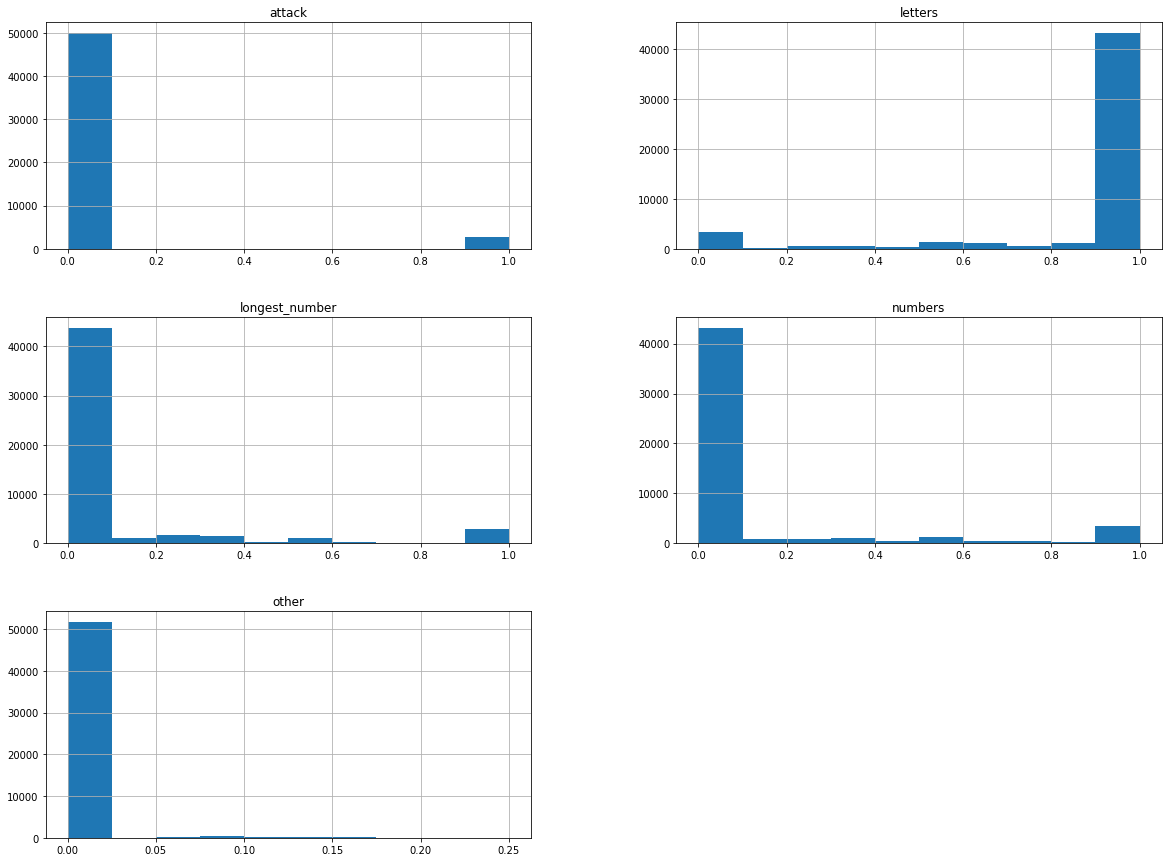

In [7]:
dns.hist(figsize=(20,15))
plt.show()

# Creación de un "test set"
Creación usando "stratified sampling" dependiendo si una consulta es un ataque o no.

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
for train_index, test_index in split.split(dns, dns['attack']):
    train_set = dns.loc[train_index]
    test_set = dns.loc[test_index]

In [9]:
train_set['attack'].value_counts() / len(train_set)

0    0.949035
1    0.050965
Name: attack, dtype: float64

In [10]:
test_set['attack'].value_counts() / len(test_set)

0    0.949059
1    0.050941
Name: attack, dtype: float64

El conjunto de entrenamiento y el conjunto de test tienen proporciones similares.

# Descubrir y visualizar los datos

In [11]:
train_set_copy = train_set.copy()

Buscando correlaciones: comprobemos si algún atributo se correlaciona con el atributo de ataque.

In [12]:
corr_matrix = train_set_copy.corr()
corr_matrix['attack'].sort_values(ascending=False)

attack            1.000000
numbers           0.354139
longest_number    0.214831
other            -0.029131
letters          -0.354139
Name: attack, dtype: float64

Efectivamente, "numbers" y "letters" son complementarias.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd987abf1d0>,
      dtype=object)

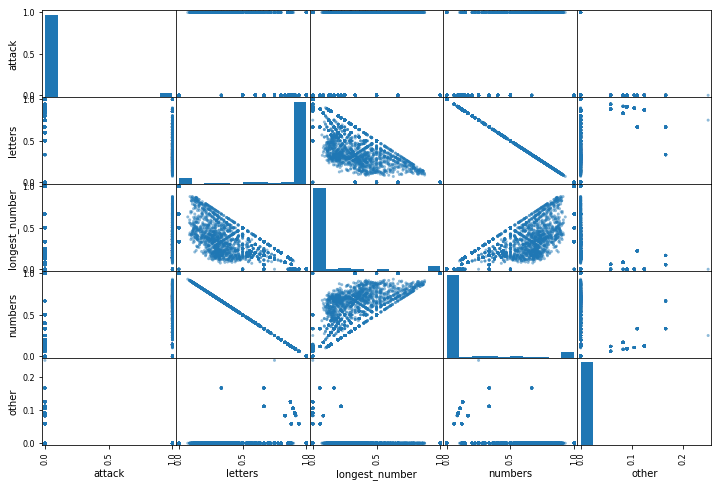

In [13]:
attributes = train_set_copy.columns
scatter_matrix(train_set_copy[attributes], figsize=(12, 8))

# Seleccionar y entrenar un modelo

In [14]:
features = train_set.drop('attack', 1)
features

,letters,longest_number,numbers,other
19038,1.000000,0.000000,0.000000,0.0
34347,1.000000,0.000000,0.000000,0.0
38293,1.000000,0.000000,0.000000,0.0
15027,1.000000,0.000000,0.000000,0.0
32646,1.000000,0.000000,0.000000,0.0
18206,0.315789,0.210526,0.684211,0.0
40710,1.000000,0.000000,0.000000,0.0
47415,1.000000,0.000000,0.000000,0.0
21099,1.000000,0.000000,0.000000,0.0
10444,1.000000,0.000000,0.000000,0.0


In [15]:
labels = train_set['attack']
labels

19038    0
34347    0
38293    0
15027    0
32646    0
18206    1
40710    0
47415    0
21099    0
10444    0
20086    0
46941    0
22703    1
27980    0
29957    0
21281    0
37689    0
35961    0
7664     1
23435    0
37630    0
35801    0
6023     0
7777     0
33452    0
20629    0
46080    0
3813     0
19759    0
2792     0
        ..
19146    0
45370    0
2599     0
9440     0
20665    0
40669    0
17967    0
21537    0
40308    0
41310    0
39340    0
26520    0
10041    0
3399     0
20828    0
21972    0
25180    0
26146    0
14883    0
32959    0
38584    0
14303    0
4482     0
19699    0
29817    0
38981    0
1251     0
29917    0
46138    0
18349    0
Name: attack, Length: 42088, dtype: int64

## Stochastic Gradient Descent (SGD) classifier

In [16]:
sgd_clf = SGDClassifier(max_iter=5, random_state=13)
sgd_clf.fit(features, labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=13, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [17]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", sgd_clf.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.
"cross_val_predict" realiza "K-fold cross-validation" devolviendo las predicciones realizadas en cada "test fold".

In [18]:
train_predicted_labels = cross_val_predict(sgd_clf, features, labels, cv=5)

In [19]:
confusion_matrix(labels, train_predicted_labels)

array([[39419,   524],
       [ 1339,   806]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [20]:
precision_score(labels, train_predicted_labels)

0.606015037593985

In [21]:
recall_score(labels, train_predicted_labels)

0.37575757575757573

In [22]:
f1_score(labels, train_predicted_labels)

0.46388489208633094

### Análisis

Obtengamos la puntuación que el clasificador SGD da a todas las predicciones.

In [23]:
labels_scores = cross_val_predict(sgd_clf, features, labels, cv=5, method="decision_function")

In [24]:
labels_scores

array([-1.33408906, -1.33408906, -1.33408906, ..., -1.4185258 ,
       -1.4185258 , -1.4185258 ])

Las puntuaciones viven entre los valores -1.41 y 3.38:

In [25]:
labels_scores.min()

-1.41852579800487

In [26]:
labels_scores.max()

3.383917508685255

Tracemos la curva de precisión vs. exhaustividad.

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(labels, labels_scores)

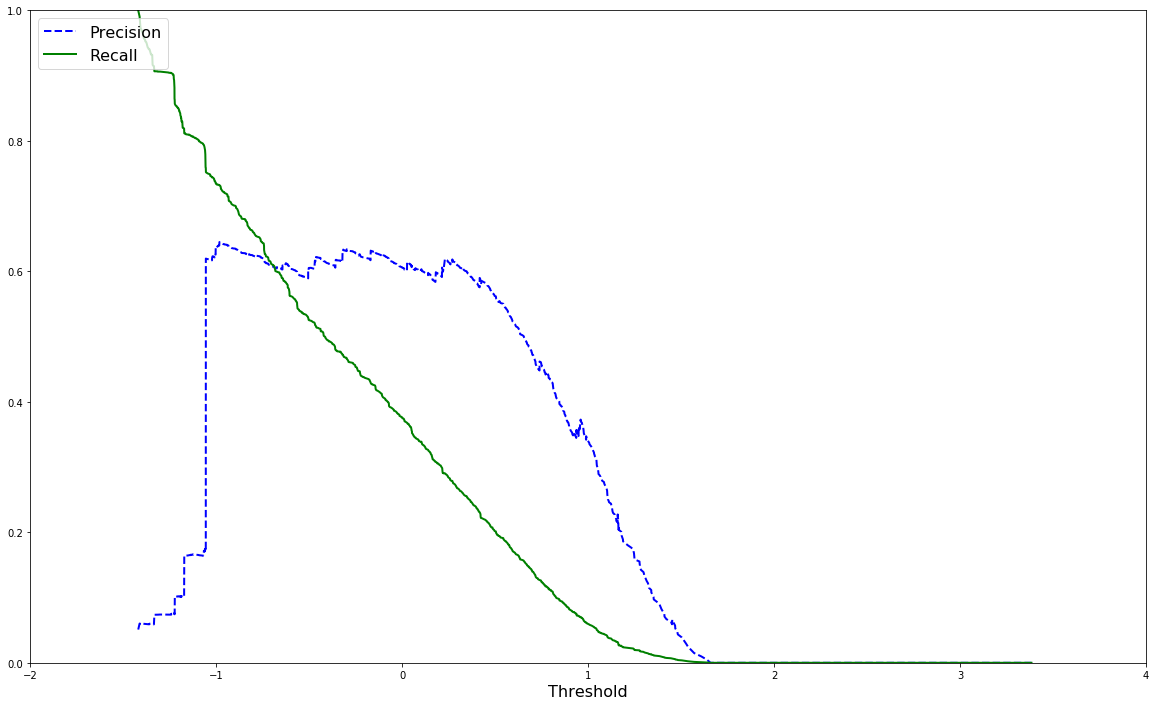

In [28]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-2, 4])
plt.show()

Con un valor cercano a -1 de umbral parece dar un resultado aceptable de precisión/exhaustividad:

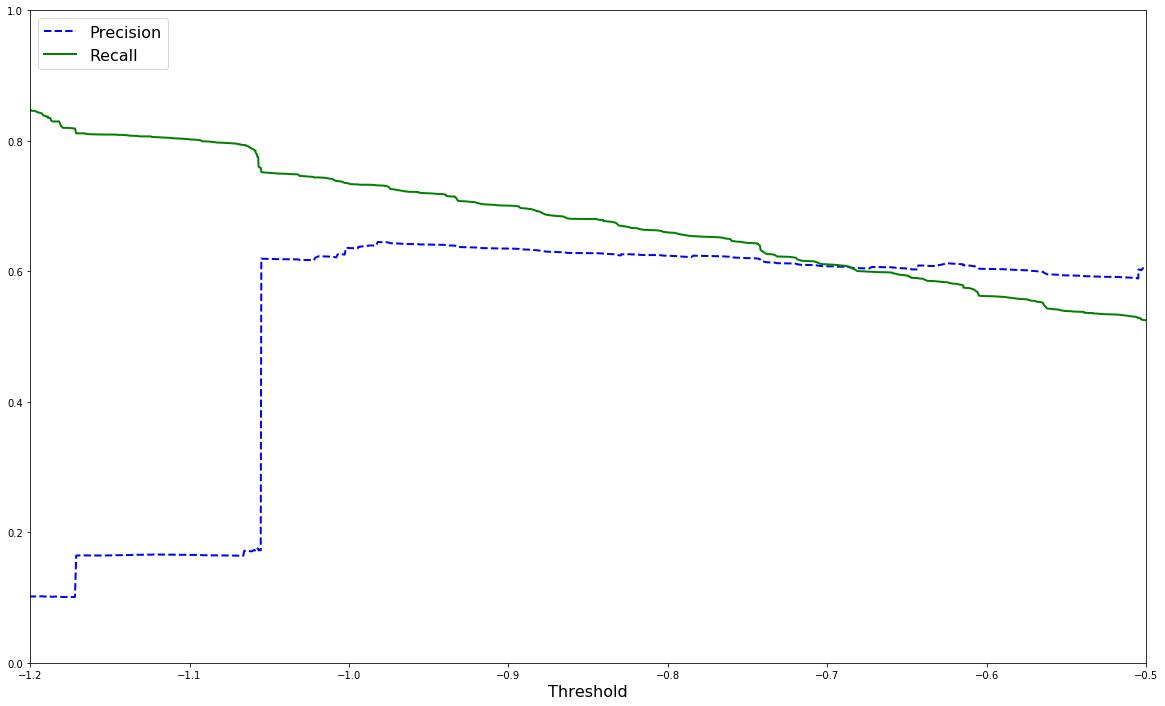

In [29]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1.2, -0.5])
plt.show()

In [30]:
labels_train_pred_30 = (labels_scores > -1)

In [31]:
confusion_matrix(labels, labels_train_pred_30)

array([[39041,   902],
       [  570,  1575]])

In [32]:
precision_score(labels, labels_train_pred_30)

0.6358498183286233

In [33]:
recall_score(labels, labels_train_pred_30)

0.7342657342657343

In [34]:
f1_score(labels, labels_train_pred_30)

0.6815231501514496

## Logistic Regression classifier

In [35]:
log_reg = LogisticRegression(random_state=13)
log_reg.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=13, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", log_reg.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [37]:
train_predicted_labels = cross_val_predict(log_reg, features, labels, cv=5)

In [38]:
confusion_matrix(labels, train_predicted_labels)

array([[39455,   488],
       [ 1647,   498]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [39]:
precision_score(labels, train_predicted_labels)

0.5050709939148073

In [40]:
recall_score(labels, train_predicted_labels)

0.23216783216783216

In [41]:
f1_score(labels, train_predicted_labels)

0.3181092302778665

### Análisis

Para poder representar gráficamente como actúa el modelo, dejemos sólo las dos características relacionadas con los números, que parecen ser más importantes.

In [42]:
reduced_features = features.drop(["letters", "other"], 1)
train_predicted_labels = cross_val_predict(log_reg, reduced_features, labels, cv=5)

In [43]:
confusion_matrix(labels, train_predicted_labels)

array([[39455,   488],
       [ 1666,   479]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [44]:
precision_score(labels, train_predicted_labels)

0.4953464322647363

In [45]:
recall_score(labels, train_predicted_labels)

0.2233100233100233

In [46]:
f1_score(labels, train_predicted_labels)

0.30784061696658094

Al deshacernos de las dos características anteriories, la precisión y exhaustividad se mantienen muy similares.
Generamos datos para ver cómo evolucionan las estimaciones con los cambios de números.

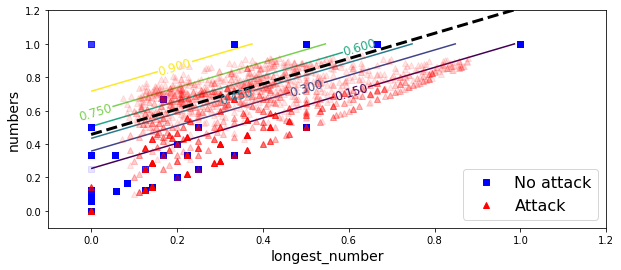

In [82]:
log_reg.fit(reduced_features, labels)

x0, x1 = np.meshgrid(
        np.linspace(0, 1, 1000).reshape(-1, 1),
        np.linspace(0, 1, 1000).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))

X = reduced_features.values
y = labels.values
# Plot the no attacks (y==0), x-axis: 'longest_number' (X[:, 0]), y-axis: 'numbers' (X[:, 1])
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", alpha=0.1, label="No attack")
# Plot the attacks (y==1), x-axis: 'longest_number' (X[:, 0]), y-axis: 'numbers' (X[:, 1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", alpha=0.1, label="Attack")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz)

left_right = np.array([0, 1])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.xlabel("longest_number", fontsize=14)
plt.ylabel("numbers", fontsize=14)

plt.axis([-0.1, 1.2, -0.1, 1.2])

leg = plt.legend(loc="lower right", fontsize=16)
# In order to show the legend with an alpha of 1
for lh in leg.legendHandles:
    lh._legmarker.set_alpha(1)

plt.show()


Con esta representación se puede ver claramente que no hay ninguna frontera de decisión debido a la distribución de las características. Por lo tanto, un modelo de "Logistic Regression" no tendrá un buen rendimiento, debido a que no es capaz de diferenciar claramente los ataques de los que no lo son.